# introduction

### Movie DataSet

     .This data speaks about movies , profits ,budgets, revenue ,directors ,genres across years

### Questions


     . top 10 movie types

     . What is top 5 highest popular movies

     . what is top 5 highest total movies budget

     . what is top 5 highest total profits

     . does the more the budget, the more profit and popularity

     . What is top 5 highest number of films directed by directors

     . which year has most profits

     .Is the film industry still winning or losing?

     . <del> which company has highest total profits </del>

     . which movie has highest duration and for each year

     . is there relation between movie's duration , profits , popularity and vote count
    
     . which film has highest average vote

     . Who is the actor with the largest number of films

     . is high popularity related to number of voted
    
     . popularity related to number of votes

## import libraries

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import missingno as ms
sb.set()
sb.set_palette('colorblind')
rcParams['figure.figsize'] = 11,11

In [406]:
import warnings
warnings.filterwarnings("ignore")

## import Dataset

In [383]:
df=pd.read_csv(r'C:\Users\HP\Desktop\alx nanodegree\project1\tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [384]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

# Data Wrangling

## Delete Unused Columns , that aren't needed for answering questions

In [385]:
del df['id']
del df['imdb_id']
del df['homepage']
del df['overview']
del df['tagline']
del df['release_date']
del df['keywords']

# check Datatype
## ( if there are any type needed to be converted )

In [386]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

all datatypes is correct

# add profits and total profits columns
### - profit = revenue - budget 
##### - first subtracte move revenue and budget , then Advertisement revenue and budget
##### - second add all profits columns into one column the same to budget 

In [387]:
df['movie_profit']=df['revenue']-df['budget']
df['adj_profit']=df['revenue_adj']-df['budget_adj']
df['total_profit']=df['adj_profit']+df['movie_profit']
df['total_budget']=df['budget_adj']+df['budget']

# Arrange columns to appear organized

In [388]:
df=df[['release_year','original_title','cast','director','runtime','genres','production_companies','vote_count','vote_average','budget_adj','revenue_adj','adj_profit','budget','revenue','movie_profit','total_budget','total_profit','popularity']]
df.head()

release_year                original_title  \
0          2015                Jurassic World   
1          2015            Mad Max: Fury Road   
2          2015                     Insurgent   
3          2015  Star Wars: The Force Awakens   
4          2015                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average    budget_adj   revenue_adj    adj_profit     budget  \
0           6.5  1.379999e+08  1.392446e+09  1.254446e+09  150000000   
1           7.1  1.379999e+08  3.481613e+08  2.101614e+08  150000000   
2           6.3  1.012000e+08  2.716190e+08  1.704191e+08  110000000   
3           7.5  1.839999e+08  1.902723e+09  1.718723e+09  200000000   
4           7.3  1.747999e+08  1.385749e+09  1.210949e+09  190000000   

      revenue  movie_profit  total_budget  total_profit  popularity  
0  1513528810    1363528810  2.879999e+08  2.617975e+09   32.985763  
1   378436354     228436354  2.879999e+08  4.385977e+08   28.419936  
2   295238201     185238201  2.112000e+08  3.556573e+08   13.112507  
3  2068178225    1868178225  3.839999e+08  3.586901e+09   11.173104  
4  1506249360    1316249360  3.647999e+08  2.527198e+09    9.335014

# Check if there are duplicates 

In [389]:
df.duplicated().sum()

1

# Drop duplicates

In [390]:
df.drop_duplicates(inplace=True)

# visualization missing values by missingno library

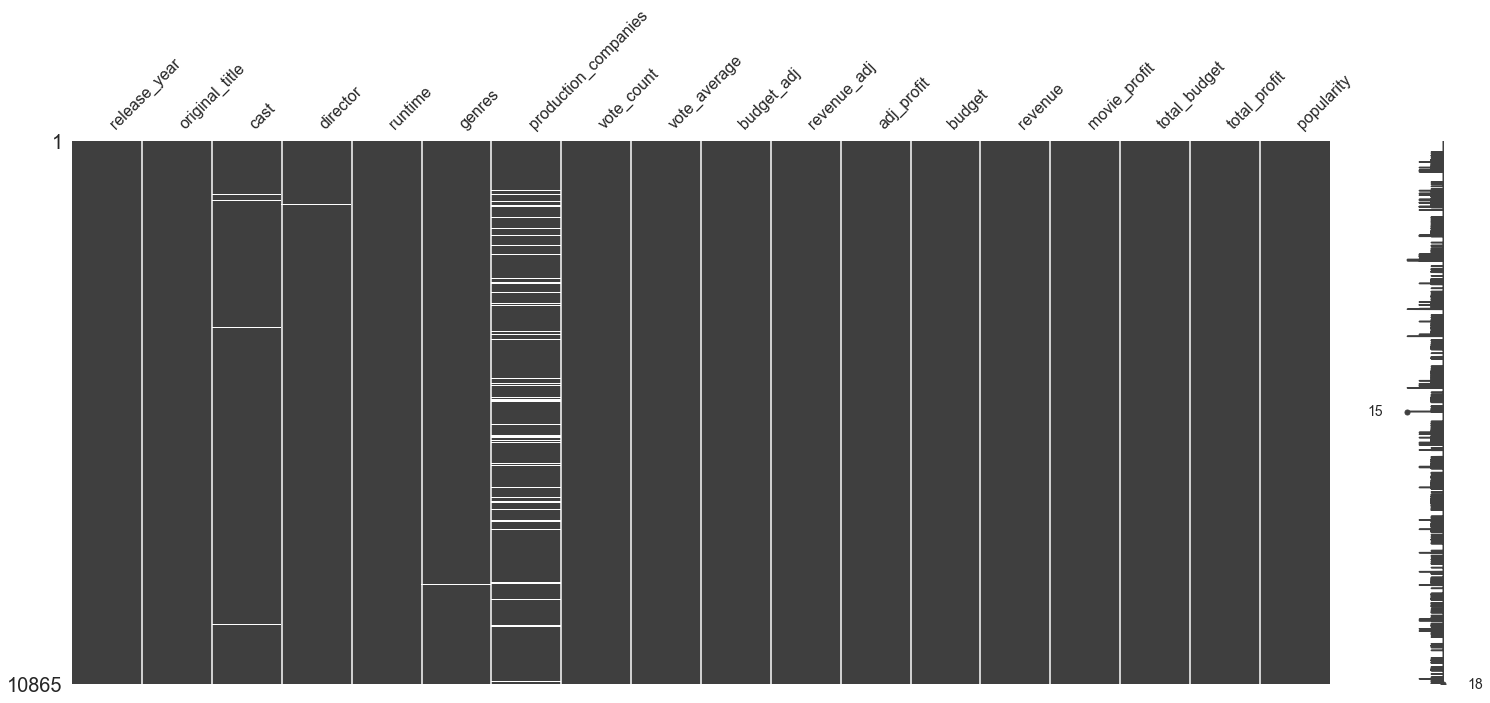

In [391]:
ms.matrix(df);

### column production_companies appears to has more missing values
### it will be missleading if i get result from it , so i delete it because it'isn't useful enough 
### and then i remove the question is related to it

In [392]:
# remove company column and his question cause it isn't useful column , it will missleading to answer my question (which company has highest total profits)   
del df['production_companies']

### remove missing values from columns because that'ren't more, aren't affect

In [393]:
# remove null values
df.dropna(axis=0,how='any',inplace=True)

# Exploratory Data Analysis

## Univariate Analysis

### top 10 movie type 

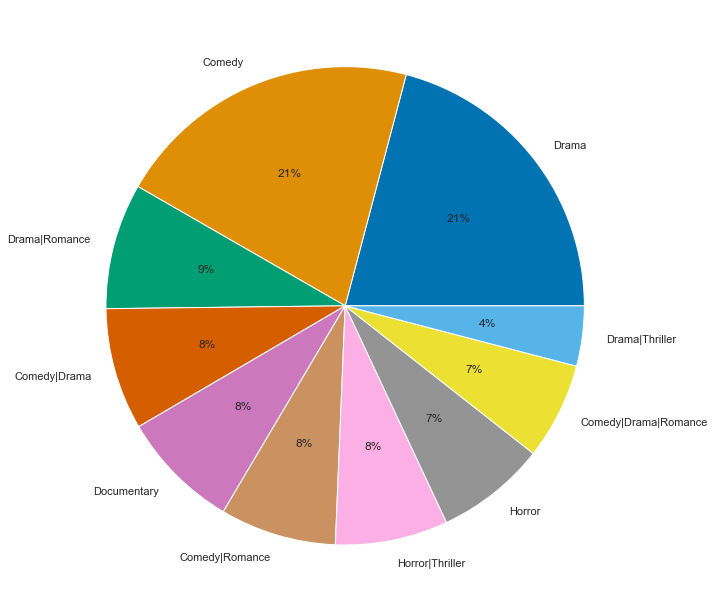

In [394]:
plt.pie(df['genres'].value_counts().nlargest(10),labels=df['genres'].value_counts().nlargest(10).index,autopct='%1.0f%%');

### Drama and Comedy are best movies types

### Who is the actor with the largest number of films
##### we should split column cast first to answer this question 
##### number of column = number of split + 1
##### we should first take copy of data 

In [410]:
d1=df.copy()

In [446]:
def split_columns(dataset,column : str):
    """
    split column which has special characters '|'
    and return new dataframe of all splits 

    Parameters:
            dataset(dataframe or series) : dataframe or seris which have the column
            column(string) : the column which needed to split

    Returns:
            new DataFrame or series of all splits happend 

    """  
    try:
        Condition=False
        if type(column.strip().lower())==str:
            x=True
            print('correct input column dtype')

    except:
        print('unvalid input column')

    else:
        if x ==True:
            condition1=False
            try: 
                if column in dataset.columns:
                    condition1=True
                else:
                    condition1=False
            except:
                print('unknonwn error')
            else :
                if condition1==True:
                        print('columns founded')

                        x=False in dataset[column].apply(lambda x : True if x.isalpha() else False).value_counts()
                        if x==True:
                            print('column has contains speical characters')
                            dataset2=dataset[~dataset[column].apply(lambda x : True if x.isalpha()==True else False)]
                            dataset2['separte']=dataset2[column].str.count('[|]')
                            #1 number of columns = 2
                            #2 number of columns = 3
                            #3 number of columns = 4
                            #4 number of columns = 5
                            spe1=dataset2[dataset2['separte']==1]
                            spe2=dataset2[dataset2['separte']==2]
                            spe3=dataset2[dataset2['separte']==3]
                            spe4=dataset2[dataset2['separte']==4]
                            datasets=['spe1','spe2','spe3','spe4']
                            l=[column]
                            for _ in (datasets):
                                if _ == 'spe1':
                                    copy1=spe1.copy()
                                    copy2=spe1.copy()

                                    for _ in l:
                                        copy1[_]=copy1[_].apply(lambda x : x.split('|')[0])
                                        copy2[_]=copy2[_].apply(lambda y : y.split('|')[1])
                                if _ == 'spe2':
                                    copy3=spe2.copy()
                                    copy4=spe2.copy()
                                    copy5=spe2.copy()
                                    for _ in l:
                                        copy3[_]=copy3[_].apply(lambda n : n.split("|")[0])
                                        copy4[_]=copy4[_].apply(lambda m : m.split("|")[1])
                                        copy5[_]=copy5[_].apply(lambda u : u.split("|")[2])
                                if _ == 'spe3':
                                    copy6=spe3.copy()
                                    copy7=spe3.copy()
                                    copy8=spe3.copy()
                                    copy9=spe3.copy()
                                    for _ in l:
                                        copy6[_]=copy6[_].apply(lambda x : x.split("|")[0])
                                        copy7[_]=copy7[_].apply(lambda x : x.split("|")[1])
                                        copy8[_]=copy8[_].apply(lambda x : x.split("|")[2])
                                        copy9[_]=copy9[_].apply(lambda x : x.split("|")[3])
                                if _ == 'spe4':
                                    copy10=spe4.copy()
                                    copy11=spe4.copy()
                                    copy12=spe4.copy()
                                    copy13=spe4.copy()
                                    copy14=spe4.copy()

                                    for _ in l:
                                        copy10[_]=copy10[_].apply(lambda x : x.split("|")[0])
                                        copy11[_]=copy11[_].apply(lambda x : x.split("|")[1])
                                        copy12[_]=copy12[_].apply(lambda x : x.split("|")[2])
                                        copy13[_]=copy13[_].apply(lambda x : x.split("|")[3])
                                        copy14[_]=copy14[_].apply(lambda x : x.split("|")[4])
                                    FullDataSet=pd.concat([copy1,copy2,copy3,copy4,copy5,copy6,copy7,copy8,copy9,copy10,copy11,copy12,copy13,copy14])
                                    return FullDataSet
                        else : 
                            print('columns hasn\'t special characters')
                else :
                    print('column isn\'t founded') 
            finally:
                if x ==True :
                    print('operation done')
    finally:
        print('thank you')

In [447]:
Question_Data=split_columns(d1,'cast')
Question_Data

correct input column dtype
columns founded
column has contains speical characters
operation done
thank you


release_year            original_title                  cast  \
216            2015                      Lava           Napua Greig   
264            2015               Cartel Land        Robert Hetrick   
343            2015  Minions: The Competition         Pierre Coffin   
460            2015      A LEGO Brickumentary         Jason Bateman   
523            2015             The True Cost         Vandana Shiva   
...             ...                       ...                   ...   
10861          1966        The Endless Summer        Chip Fitzwater   
10862          1966                Grand Prix         Brian Bedford   
10863          1966       Beregis Avtomobilya  Lyubov Dobrzhanskaya   
10864          1966    What's Up, Tiger Lily?        Tadao Nakamaru   
10865          1966  Manos: The Hands of Fate     Stephanie Nielson   

                         director  runtime  \
216             James Ford Murphy        7   
264              Matthew Heineman      100   
343       Kyle Balda|Julien Soret        4   
460    Kief Davidson|Daniel Junge       93   
523                 Andrew Morgan       92   
...                           ...      ...   
10861                 Bruce Brown       95   
10862          John Frankenheimer      176   
10863              Eldar Ryazanov       94   
10864                 Woody Allen       80   
10865            Harold P. Warren       74   

                                      genres  vote_count  vote_average  \
216    Animation|Comedy|Family|Fantasy|Music         298           7.3   
264                        Drama|Documentary         112           7.5   
343                                Animation          16           5.9   
460                              Documentary          49           6.5   
523                              Documentary          39           7.6   
...                                      ...         ...           ...   
10861                            Documentary          11           7.4   
10862                 Action|Adventure|Drama          20           5.7   
10863                         Mystery|Comedy          11           6.5   
10864                          Action|Comedy          22           5.4   
10865                                 Horror          15           1.5   

          budget_adj  revenue_adj     adj_profit  budget  revenue  \
216         0.000000          0.0       0.000000       0        0   
264         0.000000          0.0       0.000000       0        0   
343         0.000000          0.0       0.000000       0        0   
460    597999.736880          0.0 -597999.736880  650000        0   
523         0.000000          0.0       0.000000       0        0   
...              ...          ...            ...     ...      ...   
10861       0.000000          0.0       0.000000       0        0   
10862       0.000000          0.0       0.000000       0        0   
10863       0.000000          0.0       0.000000       0        0   
10864       0.000000          0.0       0.000000       0        0   
10865  127642.279154          0.0 -127642.279154   19000        0   

       movie_profit  total_budget  total_profit  popularity  separte  
216               0  0.000000e+00  0.000000e+00    0.640151        1  
264               0  0.000000e+00  0.000000e+00    0.471393        1  
343               0  0.000000e+00  0.000000e+00    0.344994        1  
460         -650000  1.248000e+06 -1.248000e+06    0.206155        1  
523               0  0.000000e+00  0.000000e+00    0.137772        1  
...             ...           ...           ...         ...      ...  
10861             0  0.000000e+00  0.000000e+00    0.080598        4  
10862             0  0.000000e+00  0.000000e+00    0.065543        4  
10863             0  0.000000e+00  0.000000e+00    0.065141        4  
10864             0  0.000000e+00  0.000000e+00    0.064317        4  
10865        -19000  1.466423e+05 -1.466423e+05    0.035919        4  

[52197 rows x 18 columns]

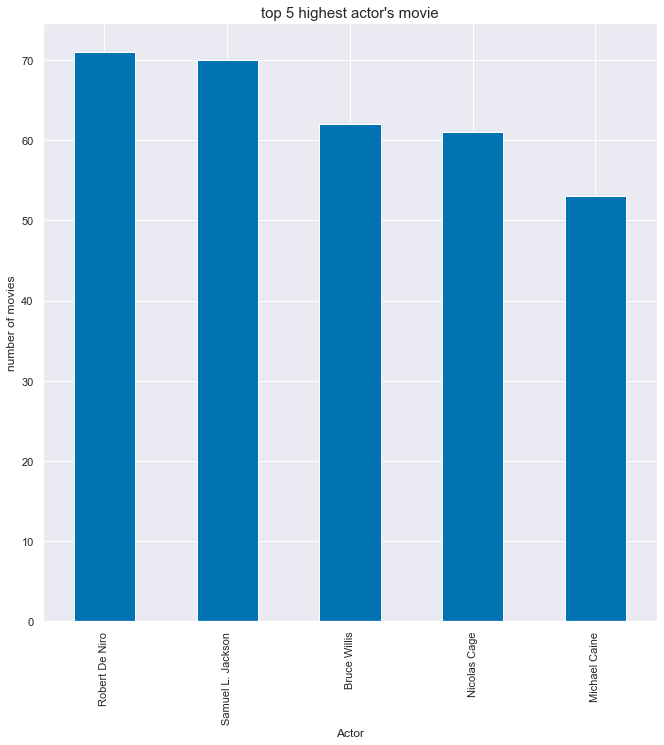

In [229]:
Question_Data.groupby('cast')['cast'].count().nlargest(5).plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('number of movies')
plt.title('top 5 highest actor\'s movie',fontsize=15);

Robert De Niro is in first place with 72 movie ,Samuel L. Jackson  with 71 film
..are good actors for your movie

# Bivariate Analysis

### What is top 5 highest popular movies

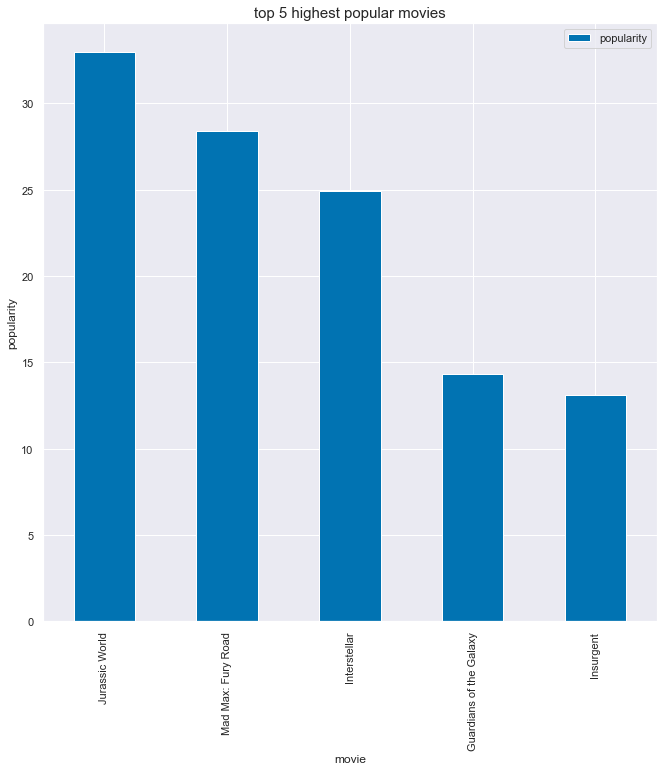

In [230]:
df.loc[df['popularity'].isin(df['popularity'].nlargest(5))][['original_title','popularity']].sort_values(by=['popularity'],ascending=False).plot(kind='bar')
labels=['Jurassic World','Mad Max: Fury Road','Interstellar','Guardians of the Galaxy','Insurgent']
plt.xticks(np.arange(len(df.loc[df['popularity'].isin(df['popularity'].nlargest(5))][['original_title','popularity']].sort_values(by=['popularity'],ascending=False))),labels)
plt.xlabel('movie')
plt.ylabel('popularity')
plt.title('top 5 highest popular movies',fontsize=15);

### jurassic world , mad max
##### shoud know what makes people like top popularity movies or what makes this movies popular

# What is top 5 highest total profits movies

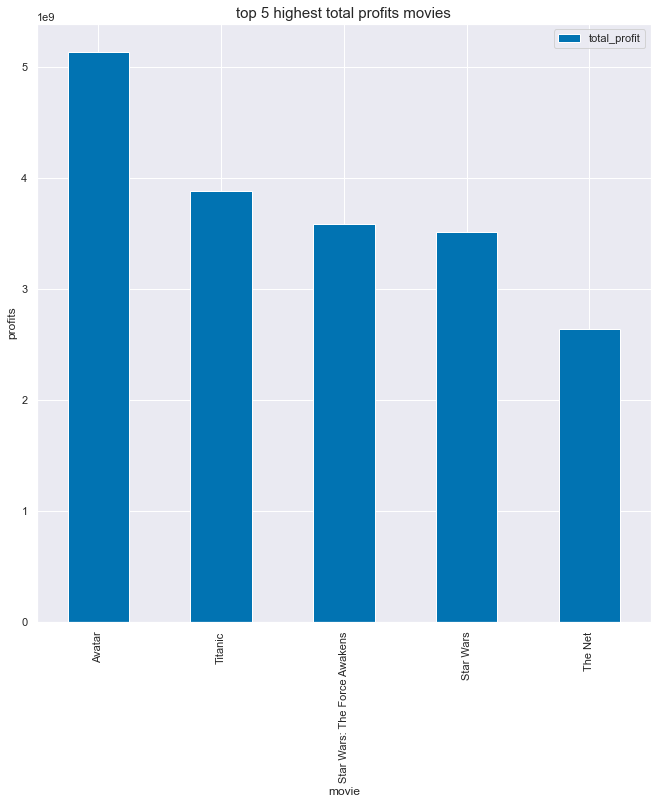

In [231]:
df[['original_title','total_profit']].nlargest(5,columns='total_profit').plot(kind='bar')
l1=['Avatar','Titanic','Star Wars: The Force Awakens','Star Wars','The Net']
plt.xticks(np.arange(len(df[['original_title','total_profit']].nlargest(5,columns='total_profit'))),l1)
plt.xlabel('movie')
plt.ylabel('profits')
plt.title('top 5 highest total profits movies',fontsize=15);

Avatar in first place which gained most profits and in second place titanc

# What is top 5 highest total budget

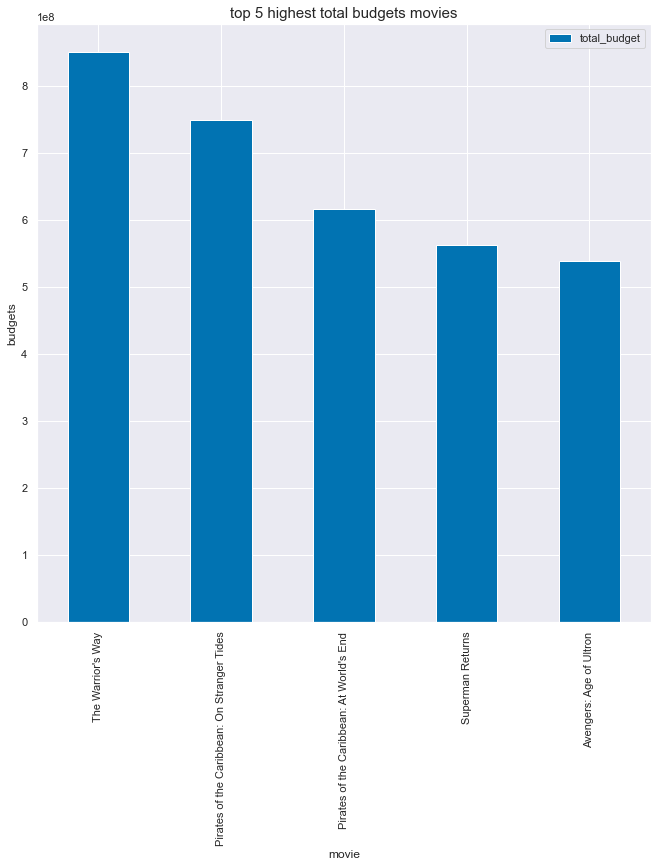

In [232]:
df[['original_title','total_budget']].nlargest(5,columns=['total_budget']).plot(kind='bar')
l2=['The Warrior\'s Way','Pirates of the Caribbean: On Stranger Tides','Pirates of the Caribbean: At World\'s End','Superman Returns','Avengers: Age of Ultron']
plt.xticks(np.arange(len(df[['original_title','total_budget']].nlargest(5,columns=['total_budget']))),l2)
plt.xlabel('movie')
plt.ylabel('budgets')
plt.title('top 5 highest total budgets movies',fontsize=15);

the warriors's way is the most movie spend money 

# Does the more the budget, the more profit and popularity

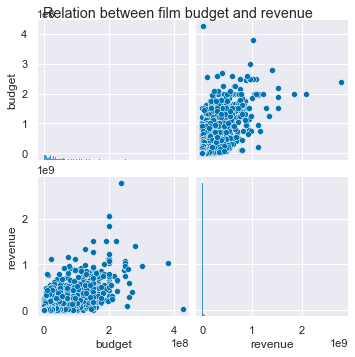

In [435]:
plt.rcParams['figure.constrained_layout.use'] = True
sb.pairplot(df.iloc[:,-6:-4]).fig.suptitle("Relation between film budget and revenue");

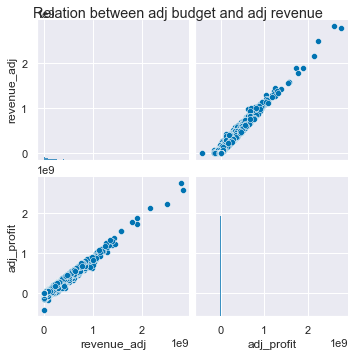

In [436]:
sb.pairplot(df.iloc[:,-8:-6]).fig.suptitle("Relation between adj budget and adj revenue");

the relation between revenue and budget is strong positive , so when  more the budget, the more profit

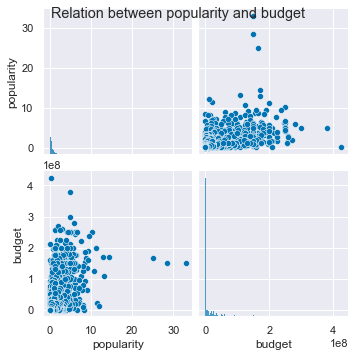

In [437]:
sb.pairplot(df.iloc[:,np.r_[-1,-6]]).fig.suptitle("Relation between popularity and budget");

more budget the more popularity
cause more budget means good effect , tools , actors , director all of this affect the movie's quality

# What is top 5 highest number of films directed by directors

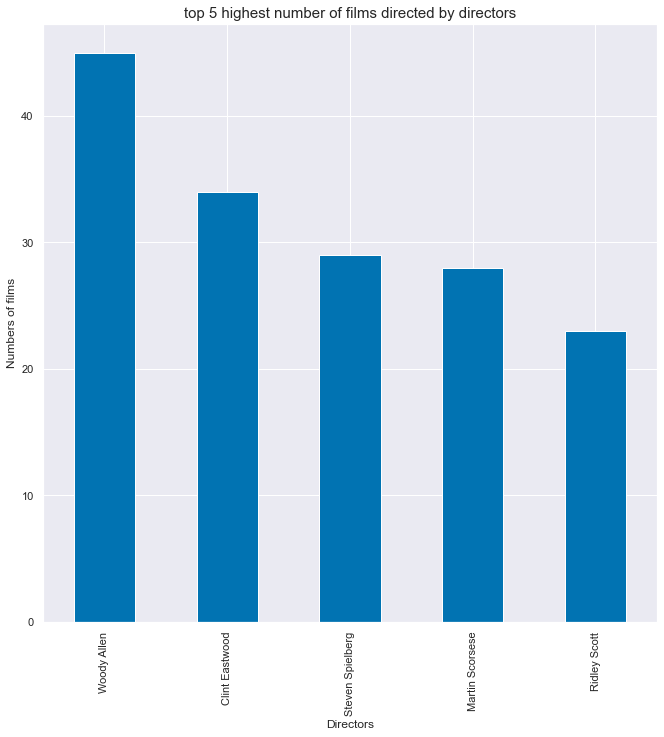

In [235]:
df.groupby(['director'])['director'].count().nlargest(5).plot(kind='bar')
plt.xlabel('Directors')
plt.ylabel('Numbers of films')
plt.title('top 5 highest number of films directed by directors',fontsize=15);

Woody Allen is in First place of total numbers of movies 

# which year has most profits


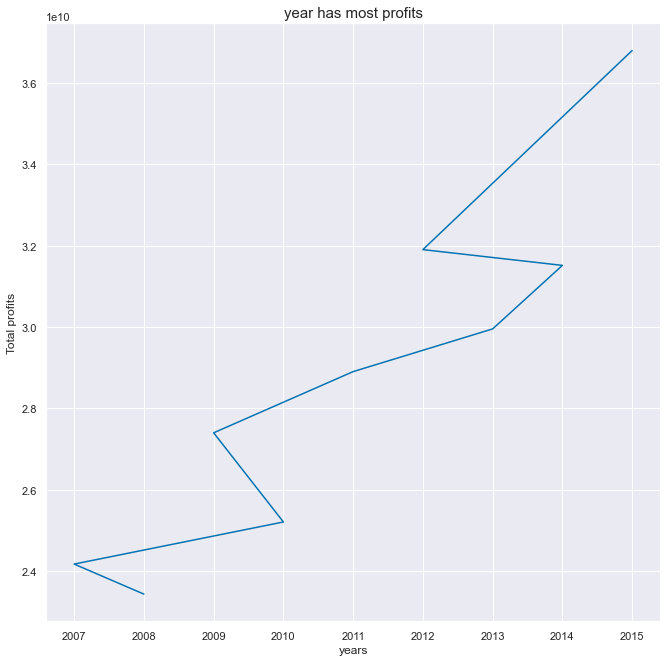

In [236]:
df.groupby(['release_year'])['total_profit'].sum().nlargest(9).plot()
plt.xlabel('years')
plt.ylabel('Total profits')
plt.title('year has most profits',fontsize=15);

2015 is the most year has highest profits

# Is the film industry still winning or losing?

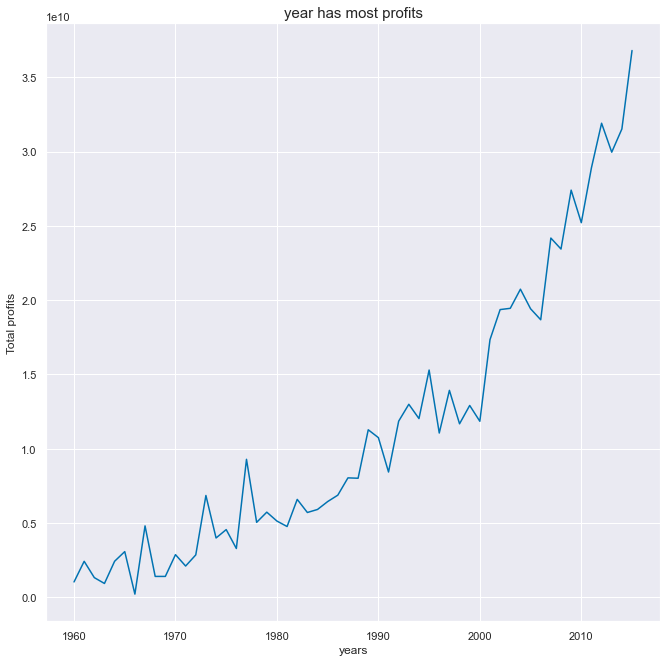

In [237]:
df.groupby(['release_year'])['total_profit'].sum().plot()
plt.xlabel('years')
plt.ylabel('Total profits')
plt.title('year has most profits',fontsize=15);

Through this data set, up to the year 2015, the film industry is profitable

# which movie has highest duration and highest duration movie year


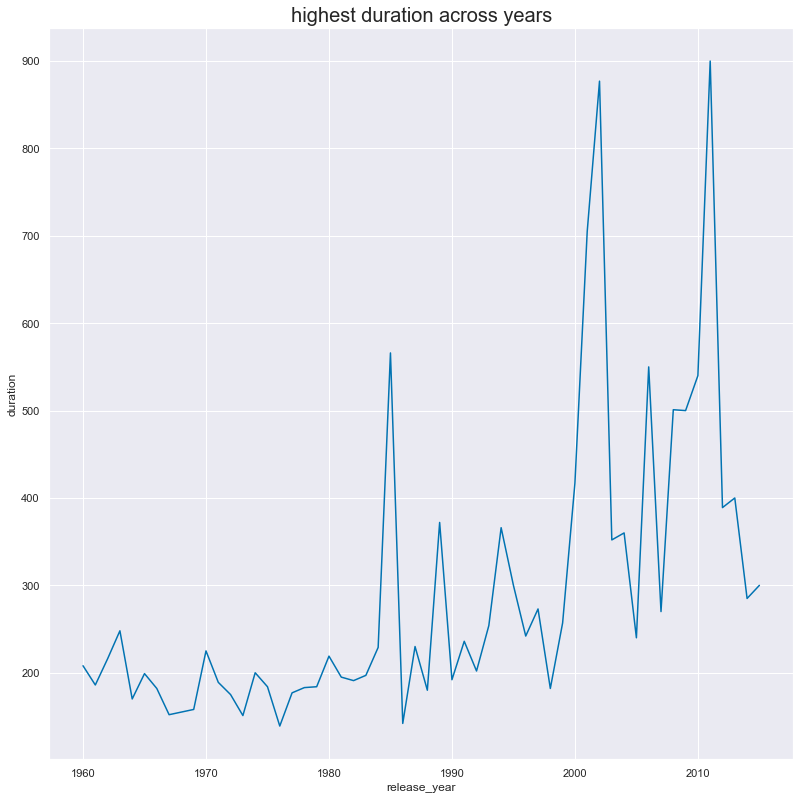

In [441]:
df.groupby(['release_year'])['runtime'].max().plot()
plt.title('highest duration across years',fontsize=20)
plt.ylabel('duration');

2011 in first place 

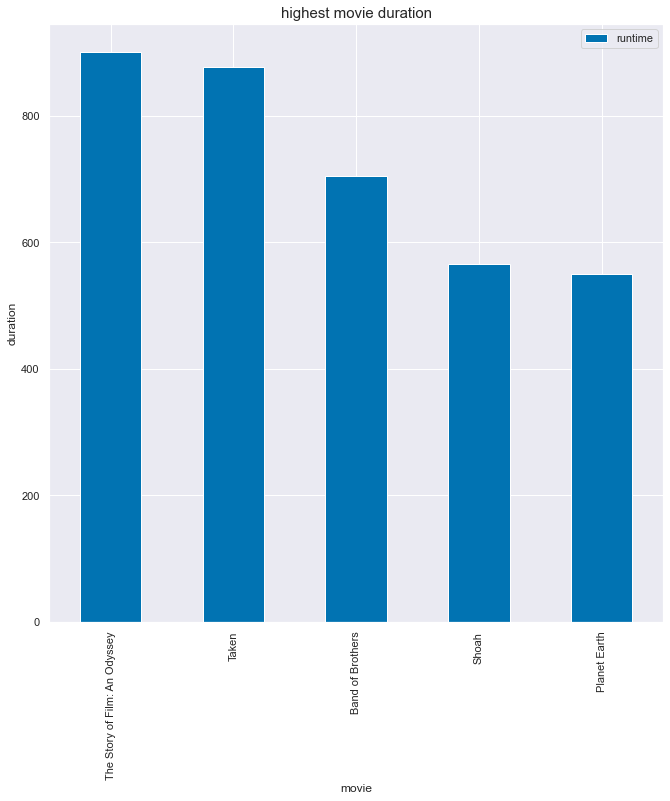

In [242]:
df[['original_title','runtime']].nlargest(5,columns=['runtime']).plot(kind='bar')
l4=['The Story of Film: An Odyssey','Taken','Band of Brothers','Shoah','Planet Earth']
plt.xticks(np.arange(len(df[['original_title','runtime']].nlargest(5,columns=['runtime']))),l4)
plt.xlabel('movie')
plt.ylabel('duration')
plt.title('highest movie duration',fontsize=15);

# Is there relation between popularity and duration of film , more duration more popularity ?

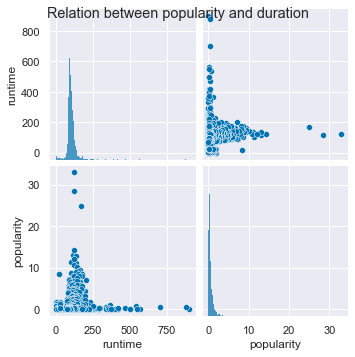

In [442]:
sb.pairplot(df[['runtime','popularity']]).fig.suptitle("Relation between popularity and duration");

In [186]:
df[['original_title','runtime','popularity','vote_count']].nlargest(20,columns=['runtime'])

original_title  runtime  popularity  \
3894                      The Story of Film: An Odyssey      900    0.006925   
4041                                              Taken      877    0.469332   
2722                                   Band of Brothers      705    0.537593   
6176                                              Shoah      566    0.147489   
6894                                       Planet Earth      550    0.137913   
2214                                        The Pacific      540    0.757082   
3356                                         John Adams      501    0.136540   
1865                                               Life      500    0.102223   
3141                                    Generation Kill      470    0.336308   
2170                           The Pillars of the Earth      421    0.082894   
8766                                   The 10th Kingdom      417    0.385239   
2843                                    The Blue Planet      400    0.114027   
6008  Crystal Lake Memories: The Complete History of...      400    0.141918   
4788                                  World Without End      389    0.179240   
9300                                      Lonesome Dove      372    0.123132   
4198                                          The Stand      366    1.180484   
7256                                          SoupÃ§ons      360    0.001315   
5121                                  Angels in America      352    0.321600   
2107                                             Carlos      338    0.534192   
3886                                     Mildred Pierce      336    0.044221   

      vote_count  
3894          14  
4041          38  
2722         313  
6176          16  
6894          65  
2214         183  
3356          33  
1865          24  
3141          28  
2170          22  
8766          33  
2843          22  
6008          10  
4788          10  
9300          16  
4198          63  
7256          12  
5121          31  
2107          35  
3886          21

from plot and this table that's mean more duration will be more boring , not popular from watcher , less votes and less profits

# top 5 movies have highest average vote

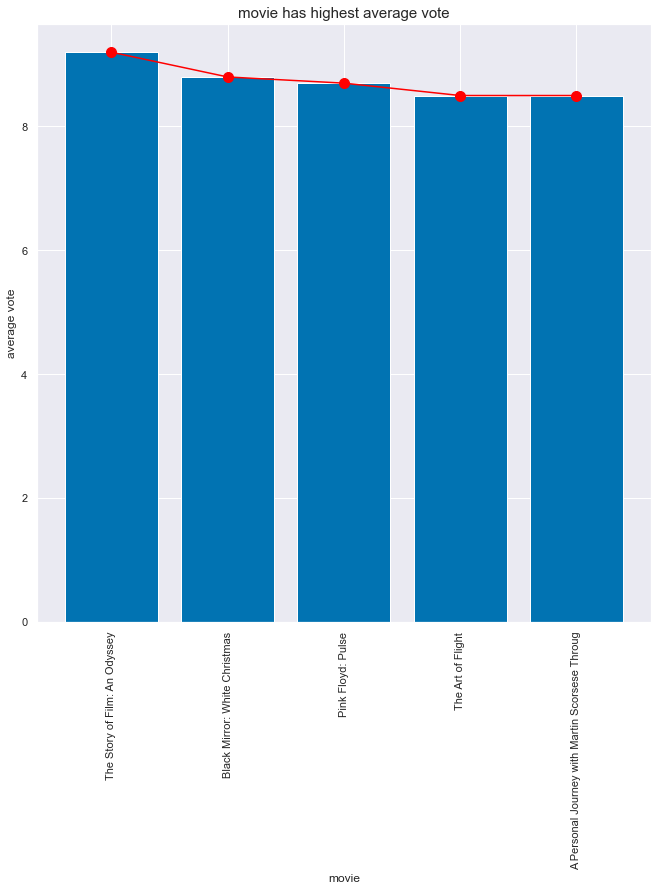

In [332]:
x=df[['original_title','vote_average']].nlargest(n=5,columns=['vote_average'])
plt.bar(x['original_title'],x['vote_average'])
plt.plot(x['original_title'],x['vote_average'],color='red',marker=".",markersize=20)
plt.xticks(np.arange(5),['The Story of Film: An Odyssey','Black Mirror: White Christmas','Pink Floyd: Pulse','The Art of Flight','A Personal Journey with Martin Scorsese Throug'],rotation=90);
plt.xlabel('movie')
plt.ylabel('average vote')
plt.title('movie has highest average vote',fontsize=15);

should know what was happened and preparation in 
"The Story of film : An Odyssey" if you are going to make an film to get high votes


# popularity related to number of votes

### i'm going to classification to get useful information i divide popularity columns into two 2 Classes high popularity and lowe popularity 

In [444]:
df['popular']=df['popularity'].apply(lambda x : 'low popularity' if x < df['popularity'].median() else 'high popularity')

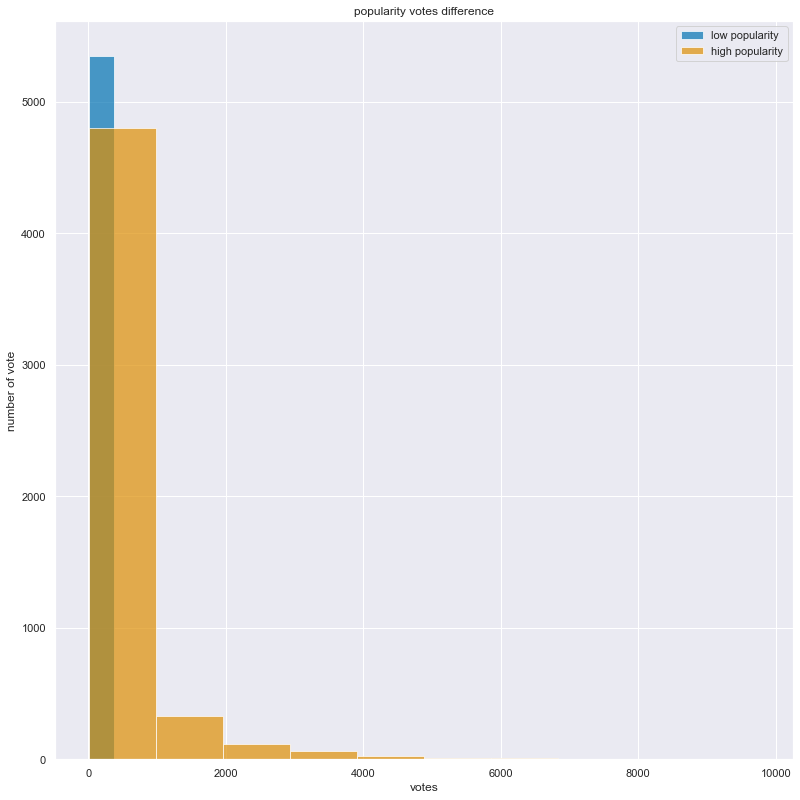

In [445]:
df[df['popular']=='low popularity']['vote_count'].hist(alpha=0.7,label='low popularity')
df[df['popular']=='high popularity']['vote_count'].hist(alpha=0.7,label='high popularity')
plt.ylabel('number of vote')
plt.title('popularity votes difference')
plt.xlabel('votes')
plt.legend();

there is relation between popularity and number of votes 
// high votes = high popularity
// low votes = low popularity

# Conclusions 

### if you are going to make new movie or get in movie industry you should know some point before getting in this industry to make your movie success:
#### My Analysis
1-Drama and Comedy are best movies types 

2-Robert De Niro is in first place with 72 movie ,Samuel L. Jackson with 71 film ..are good actors for your movie 

3-jurassic world ,mad max are high popularity ,you shoud know what makes people like this movies or what makes this movies popular ,the same thing for Avatar in first place which gained most profits and in second place titanc  

4-more budget = more profit
more budget = more popularity
cause more budget means good effects , tools , actors and directors , all of this affect the movie's quality and the watcher

5-Woody Allen is in First place of total numbers of movies that's mean he has high experienced in movie industry you will need his advises if you are going to get in movie industry

6-up to the year 2015, making movies industry is profitable

7-more movie duration =  more boring , not popular from watcher , less votes and less profits and popularity

8-should know what was happened and preparation in "The Story of film : An Odyssey" if you are going to make an film to avoid  get low votes

9-relation between popularity and number of votes // high votes = high popularity // low votes = low popularity

## recommanditions
#### making movies industry profitable ,you should make movie in Comedy or drama types ,avoid long duration ,take advise from experienced directors ,you have to bring famous and well-known actors ,spend more money on your movie

## limitations 
This data is for the film industry from 1960 to 2015
It is specific to the film industry

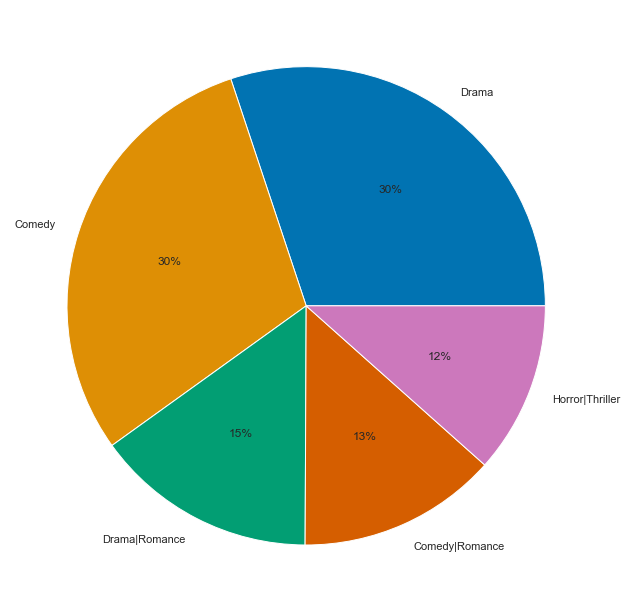

In [376]:
plt.pie(df[df['popular']=='high popularity']['genres'].value_counts().nlargest(5),labels=df[df['popular']=='high popularity']['genres'].value_counts().nlargest(5).index,autopct='%1.0f%%');

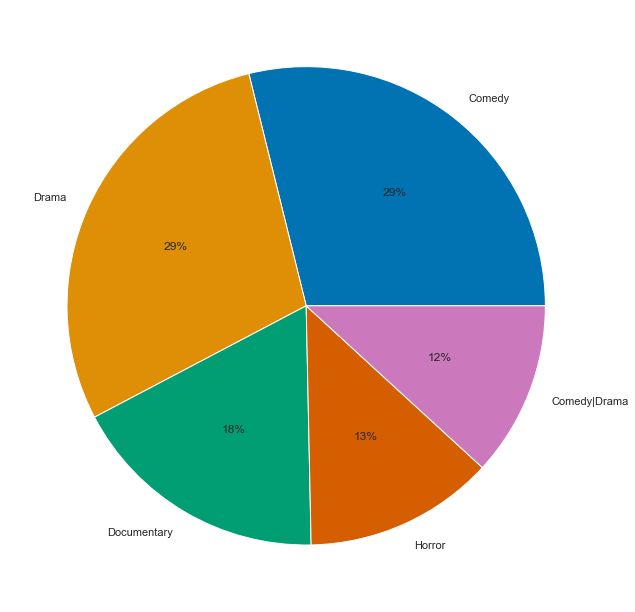

In [379]:
plt.pie(df[df['popular']=='low popularity']['genres'].value_counts().nlargest(5),labels=df[df['popular']=='low popularity']['genres'].value_counts().nlargest(5).index,autopct='%1.0f%%');

In [450]:
df['release_year'].min()

1960